In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Análisis exploratorio de datos (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

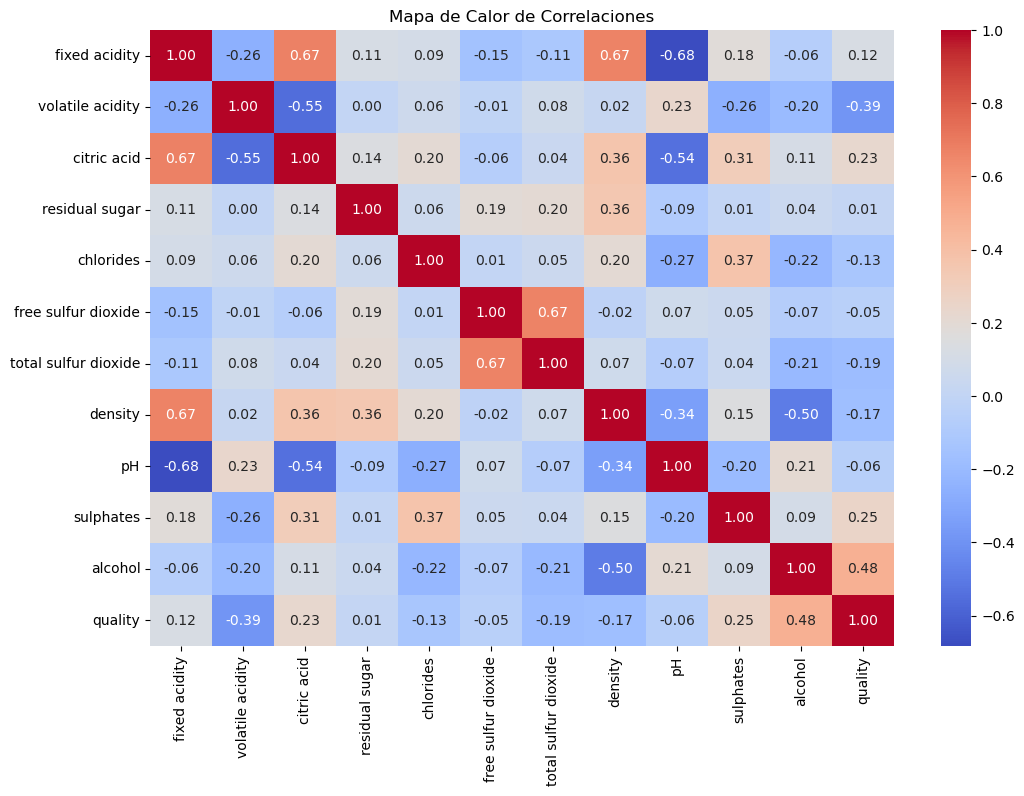

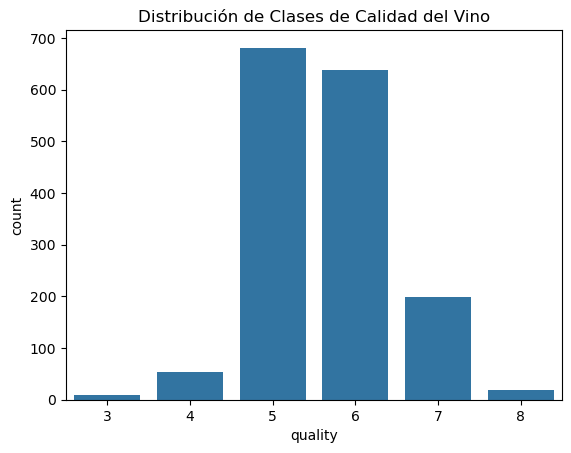

In [5]:
# Información general
print(df.info())

# Ver valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# Distribución de la variable objetivo
sns.countplot(x='quality', data=df)
plt.title("Distribución de Clases de Calidad del Vino")
plt.show()


## Preprocesamiento de datos

# No hay valores nulos ni categóricos; podemos proceder con normalización
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Selección de características

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Características seleccionadas:", selected_features)


Características seleccionadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


## Dividir en Train y Test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[selected_features], y, test_size=0.2, random_state=42)


## Entrenar modelo de Árbol de Decisión

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

## Evaluar el modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.75      0.67       130
           6       0.52      0.51      0.51       132
           7       0.43      0.31      0.36        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.52      0.55      0.53       320



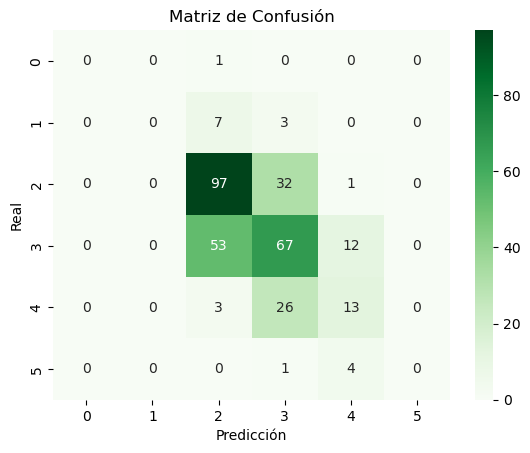

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = tree_model.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

conf_matrix = confusion_matrix(y_test, y_pred,)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## Visualizar resultados y árbol

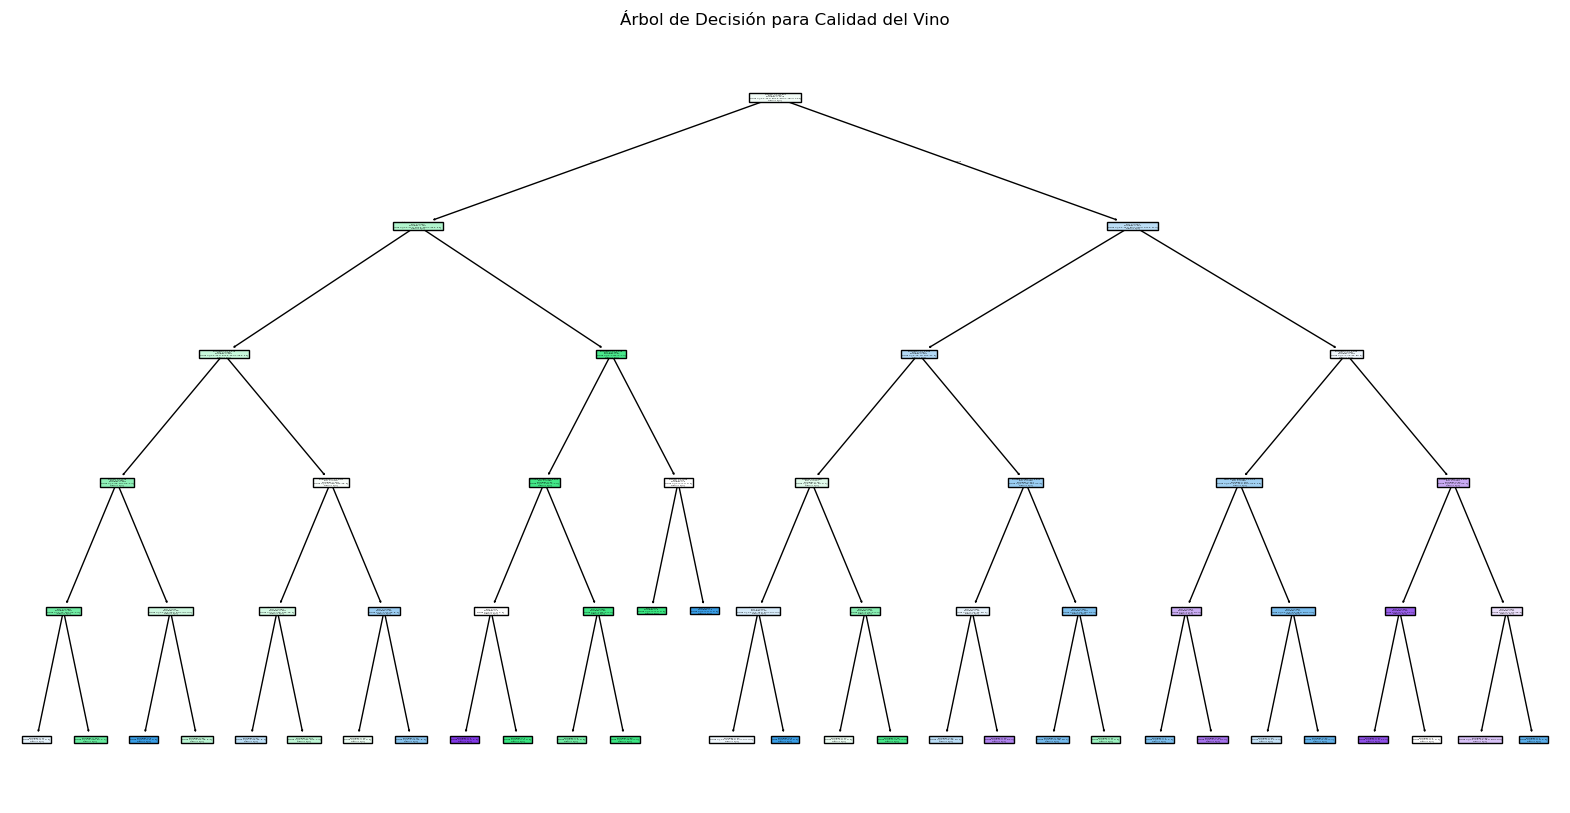

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=selected_features, class_names=True, filled=True)
plt.title("Árbol de Decisión para Calidad del Vino")
plt.show()
